<a href="https://colab.research.google.com/github/eunpro/academy/blob/main/exam04_heart_disease_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 전처리

기초: https://hogni.tistory.com/5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
#컬럼명 만들기
column_name = ['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs',
               'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
               'ca', 'hsl', 'HeartDiseasw']
#pd.read_excel(경로,헤더, 컬럼명 적용)               
raw_data = pd.read_excel('/content/datasets/heart-disease.xlsx',header=None,
                         names=column_name) 
print(raw_data.head(2)) #처음부터 총 3개 줄을 보여줌

   age  sex  cp  treshbps chol  fbs  ...  exang  oldpeak  slope  ca  hsl HeartDiseasw
0   63    1   1       145  233    1  ...      0      2.3      3   0    6            0
1   67    1   4       160  286    0  ...      1      1.5      2   3    3            1

[2 rows x 14 columns]


In [ ]:
print(raw_data.tail(2)) #뒤에서부터 총 3개 줄을 보여줌

     age  sex  cp  treshbps chol  ...  oldpeak  slope  ca  hsl  HeartDiseasw
301   57    0   2       130  236  ...      0.0      2   1    3             1
302   38    1   3       138  175  ...      0.0      1   ?    3             0

[2 rows x 14 columns]


In [ ]:
print(raw_data.describe()) #데이터의 컬럼별 요약 통계량

              age         sex          cp  ...     oldpeak       slope  HeartDiseasw
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000    303.000000
mean    54.438944    0.679868    3.158416  ...    1.039604    1.600660      0.458746
std      9.038662    0.467299    0.960126  ...    1.161075    0.616226      0.499120
min     29.000000    0.000000    1.000000  ...    0.000000    1.000000      0.000000
25%     48.000000    0.000000    3.000000  ...    0.000000    1.000000      0.000000
50%     56.000000    1.000000    3.000000  ...    0.800000    2.000000      0.000000
75%     61.000000    1.000000    4.000000  ...    1.600000    2.000000      1.000000
max     77.000000    1.000000    4.000000  ...    6.200000    3.000000      1.000000

[8 rows x 11 columns]


In [ ]:
print(raw_data.info()) #데이터 df의 정보를 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshbps      303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  hsl           303 non-null    object 
 13  HeartDiseasw  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB
None


왜 object인가?

In [ ]:
'''결측치 제거'''
clean_data = raw_data.replace('?', np.nan)
#?을 찾아서 nan으로 변형
clean_data = clean_data.dropna() #nan이 존재하는 값 제거
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshbps      296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  hsl           296 non-null    float64
 13  HeartDiseasw  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB
None


In [ ]:
keep = column_name.pop() #리스트자료형에 pop호출 시, 맨 마지막 자료 return 후 제거
print(keep) #HeartDiseasw표시
print(column_name) #HeartDiseasw 제거됨

HeartDiseasw
['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'hsl']


data.iloc[0:5] # 첫 5개행만

data.iloc[:, 0:2] # 첫 2개열만

data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th 행과 + 1st 6th 7th 열만

data.iloc[0:5, 5:8] # 첫 5개 행과 5th, 6th, 7th 열만

In [ ]:
#숫자인덱싱-> iloc, 컬럼명인덱싱 -> loc
training_data = pd.DataFrame(clean_data.iloc[:, 0:13], columns=column_name)
target = pd.DataFrame(clean_data.iloc[:,13], columns=[keep])
print(training_data.head())
print(target.head())

   age  sex  cp  treshbps   chol  fbs  ...  thalach  exang  oldpeak  slope   ca  hsl
0   63    1   1       145  233.0    1  ...      150      0      2.3      3  0.0  6.0
1   67    1   4       160  286.0    0  ...      108      1      1.5      2  3.0  3.0
3   37    1   3       130  250.0    0  ...      187      0      3.5      3  0.0  3.0
4   41    0   2       130  204.0    0  ...      172      0      1.4      1  0.0  3.0
5   56    1   2       120  236.0    0  ...      178      0      0.8      1  0.0  3.0

[5 rows x 13 columns]
   HeartDiseasw
0             0
1             1
3             0
4             0
5             0


In [ ]:
print(target['HeartDiseasw'].sum())

136


In [ ]:
print(target['HeartDiseasw'].mean()) #평균내서 몇퍼센트인지 확인 가능
#편중된 데이터로 학습하면 정확도(accuracy)가 1이 되버림 
#=> 제대로된 학습 위해서 두 개의 데이터를 같은 개수로 맞춘 후 계산

0.4594594594594595


값이 크면 weight값 커져 발산하기 때문에 보통 100으로 나눠줌

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #표준정규분포를 따르는 스케일링
scaled_data = scaler.fit_transform(training_data) #처리 과정에서 dataFrame 풀림
scaled_data = pd.DataFrame(scaled_data, columns=column_name) #다시 dataframe 형성
print(scaled_data.head())
# -1 ~ 1 => 70%이상
# -3 ~ 3 => 90%이상

        age       sex        cp  ...     slope        ca       hsl
0  0.942285  0.692820 -2.236793  ...  2.264087 -0.718421  0.660262
1  1.385714  0.692820  0.876486  ...  0.645320  2.487397 -0.890830
2 -1.939999  0.692820 -0.161274  ...  2.264087 -0.718421 -0.890830
3 -1.496571 -1.443376 -1.199033  ... -0.973448 -0.718421 -0.890830
4  0.166286  0.692820 -1.199033  ... -0.973448 -0.718421 -0.890830

[5 rows x 13 columns]


In [ ]:
print(scaled_data.describe()) #평균0, 표준편차1

                age           sex  ...            ca           hsl
count  2.960000e+02  2.960000e+02  ...  2.960000e+02  2.960000e+02
mean   4.500904e-18  2.850573e-17  ...  6.526311e-17 -2.663035e-17
std    1.001693e+00  1.001693e+00  ...  1.001693e+00  1.001693e+00
min   -2.826856e+00 -1.443376e+00  ... -7.184209e-01 -8.908300e-01
25%   -7.205712e-01 -1.443376e+00  ... -7.184209e-01 -8.908300e-01
50%    1.662857e-01  6.928203e-01  ... -7.184209e-01 -8.908300e-01
75%    7.205712e-01  6.928203e-01  ...  3.501851e-01  1.177293e+00
max    2.494285e+00  6.928203e-01  ...  2.487397e+00  1.177293e+00

[8 rows x 13 columns]


In [ ]:
print(scaled_data.describe().T) #.T하면 행과 열이 바뀜

          count          mean       std  ...       50%       75%       max
age       296.0  4.500904e-18  1.001693  ...  0.166286  0.720571  2.494285
sex       296.0  2.850573e-17  1.001693  ...  0.692820  0.692820  0.692820
cp        296.0  1.200241e-16  1.001693  ... -0.161274  0.876486  0.876486
treshbps  296.0  6.067781e-16  1.001693  ... -0.097641  0.465747  3.846075
chol      296.0  1.997276e-17  1.001693  ... -0.084871  0.554717  6.089796
fbs       296.0  7.501507e-19  1.001693  ... -0.412263 -0.412263  2.425638
restecg   296.0  2.182939e-16  1.001693  ... -0.489853  1.020526  1.020526
thalach   296.0  6.458797e-16  1.001693  ...  0.145397  0.712830  2.284183
exang     296.0  5.926190e-17  1.001693  ... -0.692820  1.443376  1.443376
oldpeak   296.0 -7.951597e-17  1.001693  ... -0.215316  0.472766  4.429243
slope     296.0  1.155232e-16  1.001693  ...  0.645320  0.645320  2.264087
ca        296.0  6.526311e-17  1.001693  ... -0.718421  0.350185  2.487397
hsl       296.0 -2.663035

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    scaled_data, target, test_size = 0.30)
#전체 중 30% test용으로 빼고 나머지 70%로 훈련
print('X_train shape : ', X_train.shape) #훈련
print('Y_train_shape : ', Y_train.shape) #훈련
print('X_test shape :', X_test.shape) #검증
print('Y_test shape :', Y_test.shape) #검증

X_train shape :  (207, 13)
Y_train_shape :  (207, 1)
X_test shape : (89, 13)
Y_test shape : (89, 1)


모델생성

In [ ]:
#모델과 관련된 수 : 하이퍼파라미터 
#하이퍼 파라미터를 조금씩 수정해가며 조정
#accuracy=1 나오면 과적합

model = Sequential()
#총 13개 input => 출력 512개(퍼셉트론 512개 필요)
model.add(Dense(512, input_dim=13, activation='relu'))
#출력 256개(퍼셉트론 256개 필요)
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
#출력 128개(퍼셉트론 128개 필요)
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
#출력 1개
model.add(Dense(1, activation='sigmoid')) #마지막은 무조건 sigmoid함수 
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               7168      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

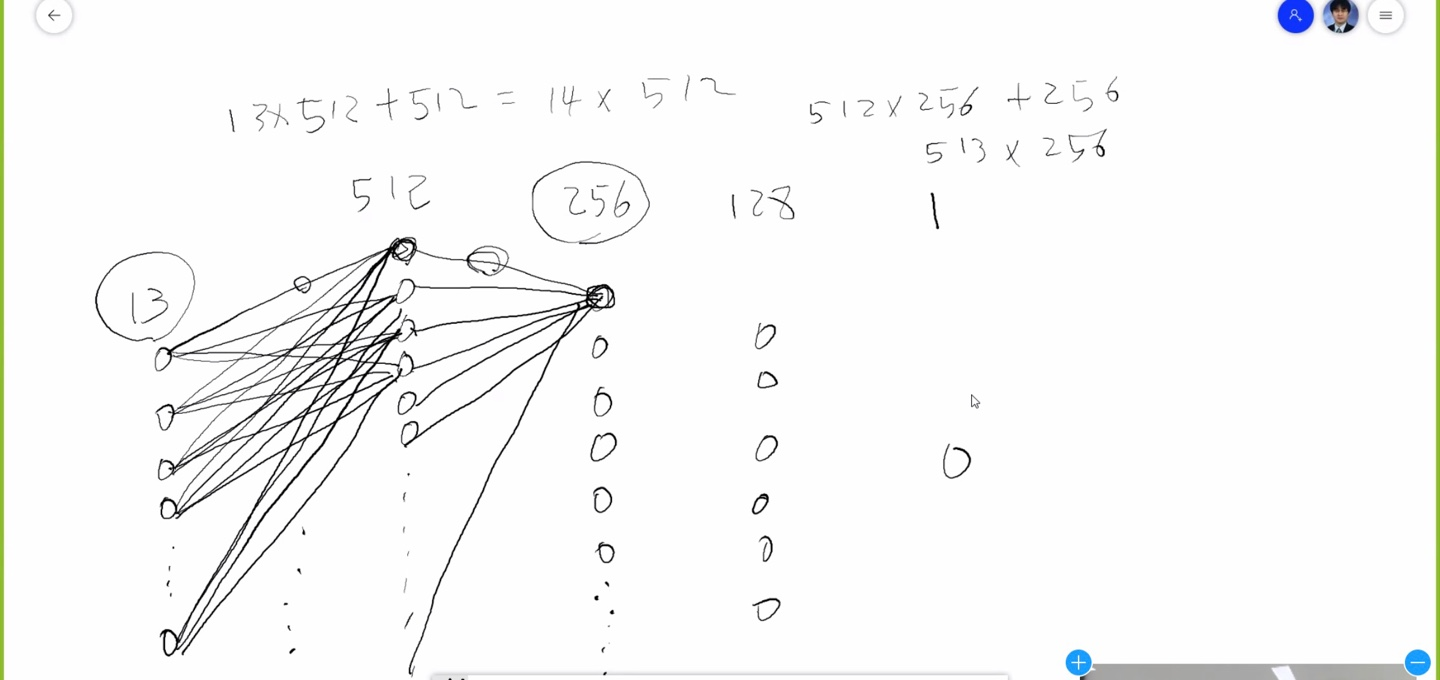

Param 수 계산

13*512 + 512 = 7168

512*256 + 256 = 131328 

256*128 + 128 = 32896 

128*1 + 1 = 129


Dense Layer 사이에 Dropout layer넣어줌

  현 데이터 학습 시, 랜덤하게 뽑힌 N% 학습 X
  
  여러번 반복학습 시 매번 새롭게 뽑음

  결국 학습은 되나, 두리 뭉술하게 학습 됨

  => 과적합을 줄여줌

In [ ]:
#50문제씩 잘라서 하는 것이 배치사이즈 #50개 랜덤하게 자름
#batch_size 사용시 빠르게 학습 가능
#epochs=50 50번 학습 => 50개씩 50set생각하면 됨
#validation_split=0.2 20%따로 뽑아 테스트하고, 나머지 학습 => test_dataset학습 X
#epoch가 반복되면 결국 test_dataset도 학습되고 과적합 발생
#batch_size => 데이터 정규분포 -> 결과 좋아짐 / 뜨문뜨문 있음 -> 편향된 결과 나올 수 있음
#               속도 느려짐
model.compile(loss='mse', optimizer='adam',metrics=['binary_accuracy'])
fit_hist = model.fit(X_train, Y_train, 
                     batch_size=50,epochs=50,
                     validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 3s 54ms/step - loss: 0.2474 - binary_accuracy: 0.5758 - val_loss: 0.2056 - val_binary_accuracy: 0.7381
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1761 - binary_accuracy: 0.8182 - val_loss: 0.1645 - val_binary_accuracy: 0.8333
Epoch 3/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1428 - binary_accuracy: 0.8424 - val_loss: 0.1450 - val_binary_accuracy: 0.8333
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1091 - binary_accuracy: 0.8667 - val_loss: 0.1412 - val_binary_accuracy: 0.8333
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1068 - binary_accuracy: 0.8606 - val_loss: 0.1387 - val_binary_accuracy: 0.8333
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0983 - binary_accuracy: 0.8727 - val_loss: 0.1429 - val_binary_accuracy: 0.8333
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0970 - binary_a

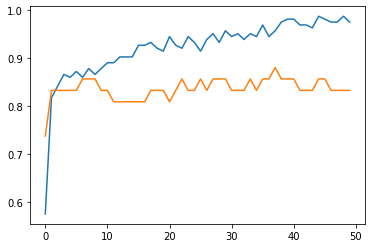

In [ ]:
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])
plt.show()

In [ ]:
#0주면 진행사항 관련 정보(학습시간, loss값, accuracy 등) 안알려줌
score = model.evaluate(X_test,Y_test, verbose=0) 
print('Keras DNN model loss :', score[0])
print('Keras DNN model accuracy :', score[1])

Keras DNN model loss : 0.17019334435462952
Keras DNN model accuracy : 0.7865168452262878


In [ ]:
#verbose 진행사항 관련 정보(학습시간, loss값, accuracy 등) 알려줌
#0 -> 진행사항 안보여줌
#1 -> 진행사항 보여줌
#2 -> 결과만 보여줌
score = model.evaluate(X_test,Y_test, verbose=1) 
print('Keras DNN model loss :', score[0])
print('Keras DNN model accuracy :', score[1])

3/3 [==============================] - 0s 4ms/step - loss: 0.1702 - binary_accuracy: 0.7865
Keras DNN model loss : 0.17019334435462952
Keras DNN model accuracy : 0.7865168452262878


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
pred = model.predict(X_test)
pred = (pred>0.5)
print(confusion_matrix(Y_test,pred))
#모델 평가할 때 accuracy는 f1_score 출력해줌
print(f1_score(Y_test, pred, average='micro')) #pred = predict 

[[39  9]
 [10 31]]
0.7865168539325842


In [ ]:
my_sample = np.random.randint(89) #0~88사이의 int값 random하게 추출
sample_data = np.array(X_test.iloc[my_sample]) #X_test중 my_sample번째 추출
sample_data = sample_data.reshape(-1,13) #sample_data전달하기 위해 형태 변형
print(model.predict(sample_data))  #sample_data전달
print(Y_test.iloc[my_sample])  #Y_test중 my_sample번째 추출

[[0.07393989]]
HeartDiseasw    1
Name: 290, dtype: int64


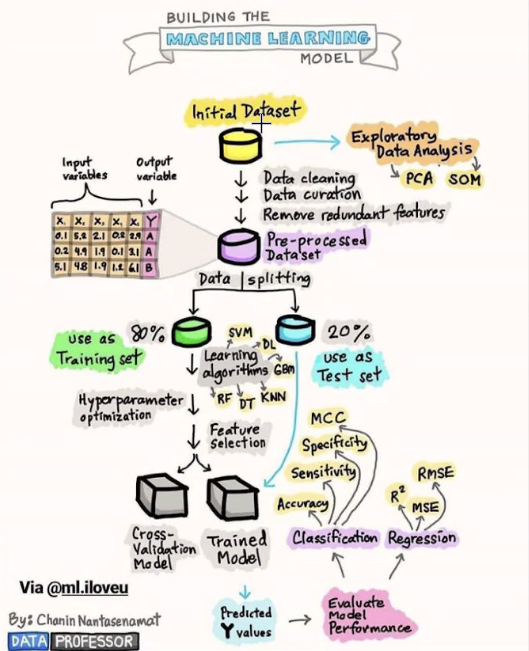